## Introduction

In this Python demonstration, we shall illustrate the properties of the Sampling Distribution as given by the **Central Limit Theorem**.

Most importantly we shall verify the following:

Given a sufficiently large sample of size $n$ taken from a population with a finite mean $\mu$ and finite variance  $\sigma^2$, the following properties will hold true:

- Sampling Distribution Mean $\mu_{\bar{x}}$ = $\mu$
- Sampling Distribution Standard Deviation (S) = $\frac{\sigma}{\sqrt{n}}$
- For $n>30$, the sampling distribution approximates a normal distribution

## Load the dataset

For this demonstration, we shall use the popular `titanic` dataset. We will primarily be focussing on the `Fare` column and using it for our experiments

In [9]:
## Import the necessary libraries
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('resources/titanic.csv')

In [11]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.shape

(891, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
## We'll plot the fare column and see what type of distribution it currently has

import matplotlib.pyplot as plt

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

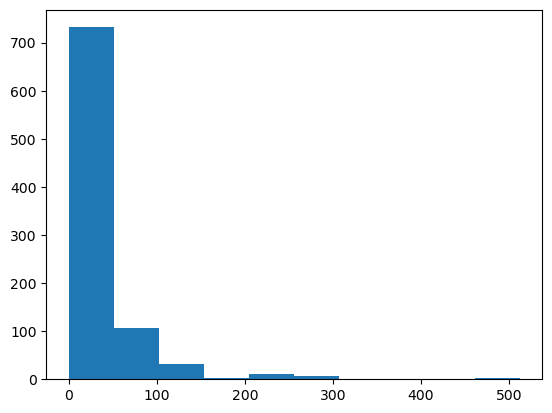

In [15]:
plt.hist(df['Fare'])

In [16]:
df['Fare'].mean()

32.204207968574636

In [17]:
df['Fare'].std()

49.693428597180905

**Observation** - The distribution is heavily skewed towards lower values between 0-100 dollars. Some outliers exist around 250-300
and some around 500

### Sampling Experiment

So for this experiment we shall assume the following:

- Population is denoted by all the fares paid by the passengers. Therefore, there are total 891 values in the population
- Sample is denoted by a random group of 100 fares chosen from the 891 fares in the population

As part of this experiment, we shall take around 100 different random samples, calculate the sample means and then store it in a pandas Series.

Later we shall plot all the sample means and see what distribution it follows

The population mean is equal to  32.204207968574636
The population standard deviation is equal to  49.693428597180905

As per Central Limit Theorem the hypothetical sampling distribution mean would be approximately equal to  32.204207968574636
and the the hypothetical sampling distribution standard deviation would be almost equal to 4.969342859718091

The actual sampling distribution mean is equal to  32.456422166
The actual sampling distribution standard deviation is equal to  4.719984440764002


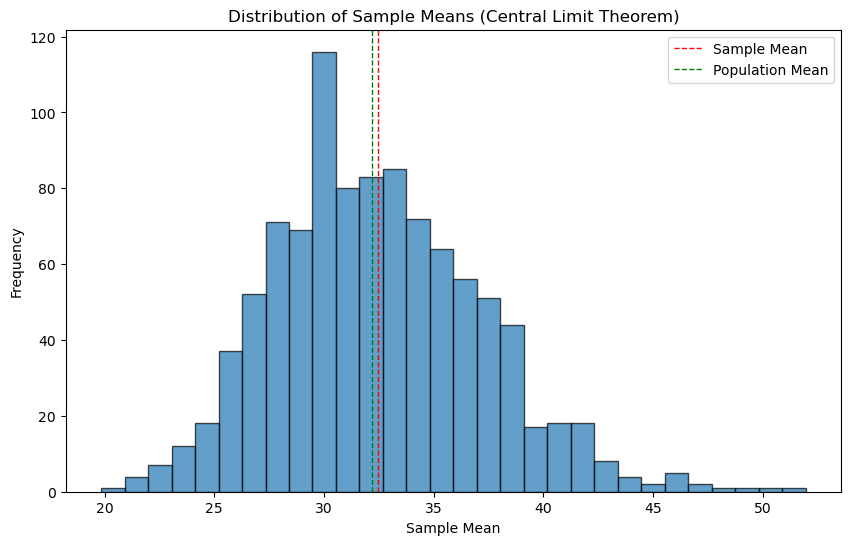

In [18]:
# Assuming df is already loaded with the Titanic dataset
# If not, you can load it using: df = pd.read_csv('path_to_titanic_dataset.csv')

# Number of samples
num_samples = 1000
sample_size = 100  # Choosing a sample size (e.g., 30, you can adjust this)

# Storing sample means
sample_means = []

# Taking "num_samples" random samples from the fare column
for _ in range(num_samples):
    sample = df['Fare'].sample(n=sample_size, replace=False)  # Sampling without replacement
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

# Converting the list of sample means to a pandas Series
sample_means_series = pd.Series(sample_means)

#Population Values
print("The population mean is equal to ", df['Fare'].mean())
print("The population standard deviation is equal to ", df['Fare'].std())

#Sampling Distribution Values as per Central Limit Theorem
print("\nAs per Central Limit Theorem the hypothetical sampling distribution mean would be approximately equal to ", df['Fare'].mean())
print("and the the hypothetical sampling distribution standard deviation would be almost equal to", df['Fare'].std()/np.sqrt(sample_size))

#Actual Values
print("\nThe actual sampling distribution mean is equal to ", sample_means_series.mean())
print("The actual sampling distribution standard deviation is equal to ", sample_means_series.std())


# Plotting the distribution of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means_series, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample Means (Central Limit Theorem)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.axvline(sample_means_series.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df['Fare'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.legend(['Sample Mean', 'Population Mean'])
plt.show()


**Observations**

- We can see that the green line (Population Mean) and the red line (Sample Mean) are almost coinciding.
- The shape of the distribution is pretty symmetrical and resembles a normal distribution
- The actual and hypothetical values of mean and standard deviation for the sampling distribution are pretty identical.

Hence we have verified the properties of Central Limit Theorem

### Effect of Sample Size

The Sample Size (n) plays out a crucial role in determining the final shape of the Sampling Distribution
Let's plot the Sampling Distribution for different values of n and observe how th shape changes across


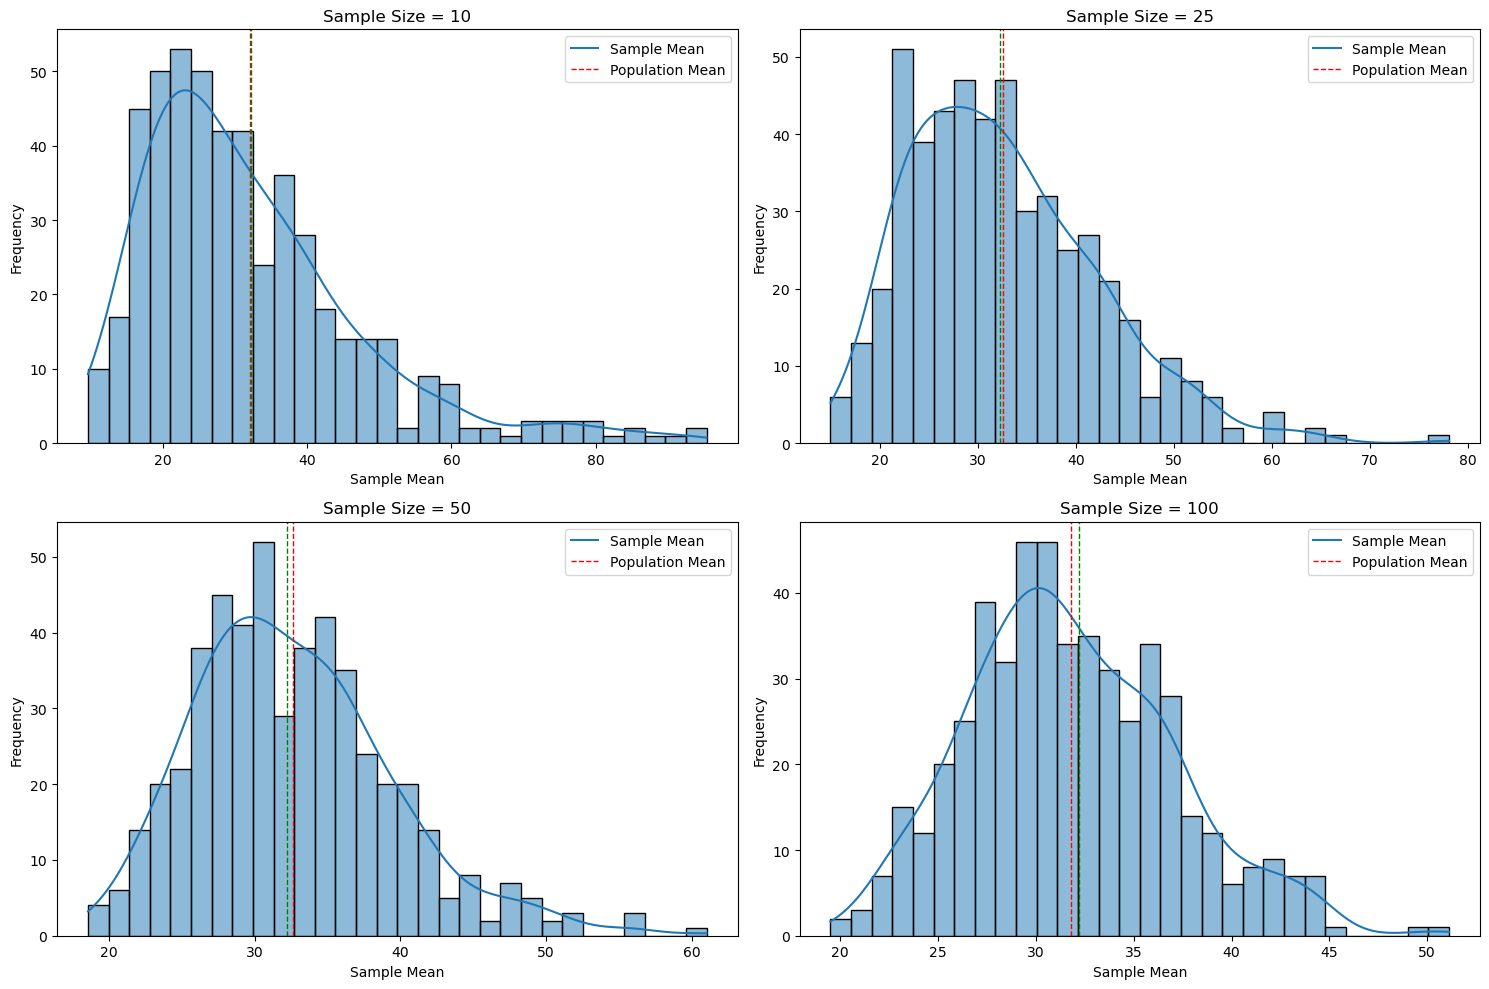

In [19]:
import seaborn as sns

# Assuming df is already loaded with the Titanic dataset
# If not, you can load it using: df = pd.read_csv('path_to_titanic_dataset.csv')

# Number of samples
num_samples = 500

# Sample sizes to test
sample_sizes = [10, 25, 50, 100]

# Setting up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Function to generate sample means and plot distribution
def plot_sample_means_distribution(sample_size, ax):
    sample_means = []
    for _ in range(num_samples):
        sample = df['Fare'].dropna().sample(n=sample_size, replace=True)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)

    sample_means_series = pd.Series(sample_means)

    sns.histplot(sample_means_series, bins=30, kde=True, ax=ax)
    ax.set_title(f'Sample Size = {sample_size}')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Frequency')
    ax.axvline(sample_means_series.mean(), color='r', linestyle='dashed', linewidth=1)
    ax.axvline(df['Fare'].mean(), color='g', linestyle='dashed', linewidth=1)
    ax.legend(['Sample Mean', 'Population Mean'])

# Plotting distributions for different sample sizes
for i, size in enumerate(sample_sizes):
    plot_sample_means_distribution(size, axes[i])

# Adjust layout for better readability
plt.tight_layout()
plt.show()


**Observations**
- For low values of n, the distribution is slightly skewed
- As the value of n increases, the shape gets more and more symmetrical
- For high values of n, the distribution resembles a normal distribution